In [44]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


In [25]:
# Changing Directory
os.chdir('/Users/annettedblackburn/Desktop/Data_Analytics_Bootcamp/Module 20 - Final (Group) Project')

In [26]:
os.listdir(os.curdir)

['.DS_Store',
 'crude-oil-price.csv',
 'twitter_NLP_json.ipynb',
 'PET_PRI_GND_DCUS_NUS_W.csv',
 'archive(2).zip',
 'tweets_NLP_new.ipynb',
 'archive(1).zip',
 'twitter_NLP.ipynb',
 'gas_oil_ML.ipynb',
 'tweets_clean.csv',
 'tweets_clean.json',
 'gas_oil_LR_twitter_NLP.py',
 '.ipynb_checkpoints',
 'gas-diesel-prices.csv']

### Description of Preliminary Data Preprocessing

Using tweets from November 24, 2022 to December 5, 2022, the data are cleaned and subjectivity and polarity score columns are included.

### Description of Preliminary Feature Engineering and Preliminary Feature Selection

To use natural language processing to characterize the sentiment of current tweets on gas prices (positive, neutral, or negative sentiment, ranging from -1.0 to 1.0).

In [27]:
twitter_df = pd.read_csv("tweets_clean.csv")
twitter_df.head()

,Unnamed: 0,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05
0,0,@BellaWallerstei They have been paying oil and...,@TrainerGonzo @Belinda71555585 It's that easy ...,@HouseGOP They tried to stick the gas price hi...,@GilHough @KamalaHarris https://t.co/LBgWDBW9xs,"@ChrisMartzWX For well over 40 years, I have p...",@POTUS Except that gas prices were on the rise...,@FinancialReview simply nonsense. Don't let th...,@BBCNews You have a responsibility to explain ...,@GustavoBolivar Es una afrenta para la industr...,@SenateGOP Except the oil and gas companies do...,@BladeoftheS He thinks nurses shouldn’t get a ...,Just When We Thought King Coal Was a Pauper\n#...
1,1,@BladeoftheS 3 The major difference between UK...,@davidmweissman Clueless! Right he inherited e...,@AnnieForTruth Yep. I remember when an attenda...,@NikkiHaley I agree use our own oil and coal a...,@WhiteHouse His executive orders on the energy...,@robreiner You really need help. Why are you s...,"@GavinNewsom You could end the gas tax, but yo...",@Marmee33 https://t.co/MeXmoIOgc9,@JDCocchiarella Jack; I can answer that questi...,@GOP And Biden has created more jobs in 2 year...,@POTUS No thanks on your nuclear energy deal d...,Alberta officials withholding list of 100s of ...
2,2,¡Oil &amp; Gas Reporter está disponible! https...,@laurenboebert Magic money? You mean from the ...,"@RBReich -\n...and the NATO Supremacists said,...",Nothing is being offered near Utah’s oil and g...,@manuel_rdgn @SEGOB_mx @adan_augusto @calderon...,TCS is a proud sponsor of the Oil &amp; Gatsby...,@POTUS Gas prices are down only because you ar...,@Sadiksmart7 @mohamedamiin2 @Qatari You can't ...,@diegowainstein El colectivo trucho de feminis...,"@SandyHasCandy @TomTSEC And somehow, in your b...","@Julesmerch @ABC Has nothing to do with oil, n...",@GavinNewsom Californians are the only state p...
3,3,@binnahar85 Europe wants to boycott Qatar? Are...,@thetruthsucks12 @haliwell51 @gmbutts No maybe...,@Princemoye1 I thought its about those that ki...,@Scott19490 @isaiahrmartin Yeah because relian...,rtr: U.S. seeks to limit flaring and methane l...,Should California tax oil profits? Gas spike h...,https://t.co/HEMuIIrFin Oil “Quality News Link...,¡Oil &amp; Gas Reporter está disponible! https...,"Cut off from Russian gas and oil imports, much...",@MichelleSteelCA If only our idiot Prime Minis...,¡Oil &amp; Gas Reporter está disponible! https...,Two energy industry groups filed a lawsuit tod...
4,4,@TheoFleury14 This was always about $$ and the...,You are full of it. You shut down our clean cr...,The big story. Proof that Westminster has been...,@RepBoebert Lauren Boebert’s income is almost ...,¡Oil &amp; Gas Reporter está disponible! https...,This is a classic example of Washington corrup...,@SenatorLankford You do know that US is the la...,#Gold #Silver and #Crypto update for 12/01/22 ...,¡Oil &amp; Gas Reporter está disponible! https...,PUMP AMERICAN OIL/NG NOW TO SAVE THE US ECONOM...,"Not to be that guy, but, this fossil fuel geop...",@GavinNewsom It's time for California to stop ...


In [60]:
twitter_df.tail()

,Tweet,sentiment
43038,Russian Upstream Oil And Gas Investment Set To...,0.000000
43039,Mosman Oil &amp; Gas - Director Holdings #MSMN...,0.000000
43040,"@BladeoftheS Tories only worship themselves, m...",-0.058333
43041,@Ronifae @sullim01 @AIWashburn @MichaelJStern1...,-0.173214
43042,"Libya Oil, Gas and Renewable Energies Expo 202...",0.000000


In [29]:
switchbag = twitter_df.values.reshape(43043, 1)
twitter_df = pd.DataFrame(switchbag)

In [62]:
# Adding column name to twitter_df
twitter_df.columns = ['Tweet', 'sentiment']
print(twitter_df)

                                                   Tweet  sentiment
1      @BellaWallerstei They have been paying oil and...   0.166667
2      @TrainerGonzo @Belinda71555585 It's that easy ...   0.296667
3      @HouseGOP They tried to stick the gas price hi...  -0.017857
4        @GilHough @KamalaHarris https://t.co/LBgWDBW9xs   0.000000
5      @ChrisMartzWX For well over 40 years, I have p...   0.071429
...                                                  ...        ...
43038  Russian Upstream Oil And Gas Investment Set To...   0.000000
43039  Mosman Oil &amp; Gas - Director Holdings #MSMN...   0.000000
43040  @BladeoftheS Tories only worship themselves, m...  -0.058333
43041  @Ronifae @sullim01 @AIWashburn @MichaelJStern1...  -0.173214
43042  Libya Oil, Gas and Renewable Energies Expo 202...   0.000000

[43042 rows x 2 columns]


In [64]:
# Example with generic data
from textblob import TextBlob

example = TextBlob("The food was great!")
print(example.sentiment.polarity)

1.0


In [65]:
# Example with actual tweet
from textblob import TextBlob

example = TextBlob("rtr: U.S. seeks to limit flaring and methane leaks from public lands drilling - President Joe Biden's administration on Monday proposed rules aimed at limiting methane leaks from oil and gas drilling on public lands. By @ValerieVolco @nicholagroom https://t.co/Pi6vCf6RyC")
print(example.sentiment)


Sentiment(polarity=0.0, subjectivity=0.06666666666666667)


In [66]:
for Tweet in twitter_df.columns:
    a = TextBlob(Tweet)
    twitter_df['sentiment'] = a.sentiment.polarity
    print(twitter_df.sentiment)

2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
        ... 
43038    0.0
43039    0.0
43040    0.0
43041    0.0
43042    0.0
Name: sentiment, Length: 43041, dtype: float64
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
        ... 
43038    0.0
43039    0.0
43040    0.0
43041    0.0
43042    0.0
Name: sentiment, Length: 43041, dtype: float64


/var/folders/_j/yd9ttlns727476l3p83m83nr0000gn/T/ipykernel_2397/2004632904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['sentiment'] = a.sentiment.polarity


In [67]:
# Returning sentiment score of inputted tweet 
def get_sentimental(target):
    return TextBlob(target).sentiment.polarity

# Converting all data to strings 
def any2str(target):
    if type(target) is not str:
        return str(target)
    else:
        return target

twitter_df['Tweet'] = twitter_df['Tweet'].apply(any2str)
twitter_df['sentiment'] = twitter_df['Tweet'].apply(get_sentimental)
twitter_df.head()

/var/folders/_j/yd9ttlns727476l3p83m83nr0000gn/T/ipykernel_2397/4046580880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['Tweet'] = twitter_df['Tweet'].apply(any2str)
/var/folders/_j/yd9ttlns727476l3p83m83nr0000gn/T/ipykernel_2397/4046580880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['sentiment'] = twitter_df['Tweet'].apply(get_sentimental)


,Tweet,sentiment
2,@TrainerGonzo @Belinda71555585 It's that easy ...,0.296667
3,@HouseGOP They tried to stick the gas price hi...,-0.017857
4,@GilHough @KamalaHarris https://t.co/LBgWDBW9xs,0.000000
5,"@ChrisMartzWX For well over 40 years, I have p...",0.071429
6,@POTUS Except that gas prices were on the rise...,0.000000


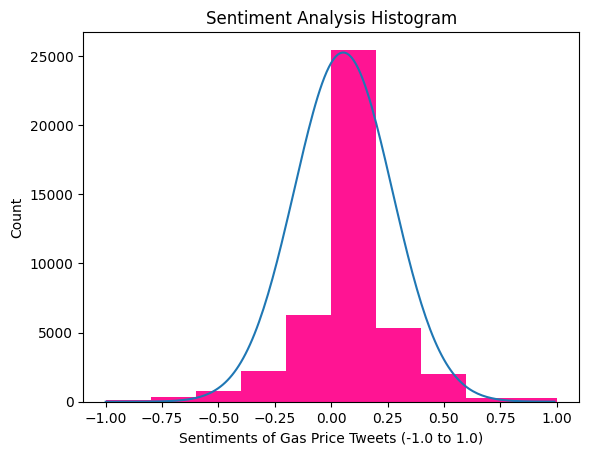

In [96]:
import matplotlib.pyplot as plt
import math 
import numpy as np
import scipy.stats as stats

def norm(x_min, x_max, avg, stdev):
    x = np.arange(x_min, x_max, 0.01)
    coeff = 1/(stdev*math.sqrt(2*math.pi))
    expo = -0.5*(((x - avg)/ stdev)**2) 
    return x, coeff*math.e**expo 

# Data Vis of Sentiments
sents = twitter_df['sentiment'].to_numpy()

mu = twitter_df['sentiment'].mean()
variance = twitter_df['sentiment'].var()
sigma = twitter_df['sentiment'].std()
bell_x, bell = norm(twitter_df['sentiment'].min(), twitter_df['sentiment'].max(), mu, sigma)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.hist(sents, color = "deeppink")
plt.plot(bell_x, bell*(0.55*25000))
plt.title("Sentiment Analysis Histogram")
plt.xlabel("Sentiments of Gas Price Tweets (-1.0 to 1.0)")
plt.ylabel("Count")

plt.savefig("sentiment_hist.png")





### Explanation of Model Choice, including Limitations and Benefits

This sentiment analysis NLP model provides a sentiment score for those who tweeted about gas and oil from November 24, 2022 to December 5, 2022. To understand the sentiment of current consumers, current data would need to be added. To include this sentiment analysis in the linear regression machine learning model, we would need more data, organized by month. Due to the limitations of the data and the data preprocessing of the linear regression model, there are only gas and diesel prices by month from January 1995 to January 2021 and February 2022 to December 2022. As a result, adding this sentiment analysis to the other model would only be adding two data points: November and December 2022 tweets.

### Train, Test, Split Description
Since the tweet data are limited to November and December, they cannot be meaningfully added to the linear regression model, so there is no training set or testing set.

### Explanation of Changes in Model Choice & Description of How the Model Has Been Trained Thus Far and Any Additional Training

Based on the formatting of the tweets and gas prices, the model went from attempting to predict current sentiment of gas prices to characterizing the sentiment from the last week in November to the first week in December.

### Description of Current Accuracy Score
Not applicable.

### How the Model Addresses the Question/Problem the Team is Solving

This sentiment analysis natural language processing model will compliment the linear regression model by showcasing general sentiment about current gas prices from tweets.